In [12]:
import matplotlib.pyplot as plt
import numpy as np

In [13]:
f = lambda x: np.sin(x) * np.sqrt(x) + 1
n = 5
h = np.pi / 7
x = (h * 0.5, h * 2.5, h * 6.5, h * 4.5, h * 1.5)    # It is worth noting that the Newton polynomial is constructed 
                                                     # without any dependence on the order of the points.

def сreateDividedDifferences(x, k):
    
    '''
    
    The function returns the divided difference of the first k points
    from the given tuple x. That is, f(x[0]; ...; x[k - 1]).
    
    '''
    
    res = 0
    for i in range(k):
        s = 1
        for j in range(k):
            if i != j:
                s *= x[i] - x[j]
        res += f(x[i]) / s
    return res

In [14]:
coords_x = [i / 639 * 2 * np.pi for i in range(1,640)]
coords_y = [[] for i in range(n)]    # For each new incoming point, we will construct a new Newton polynomial.
for i in range(n):
    for coord_x in coords_x:
        coord_y = 0
        for j in range(i + 1):
            s = 1
            for ii in range(j):
                s *= coord_x - x[ii]
            coord_y += сreateDividedDifferences(x, j + 1) * s
        coords_y[i].append(coord_y)

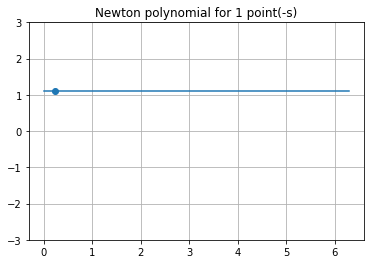

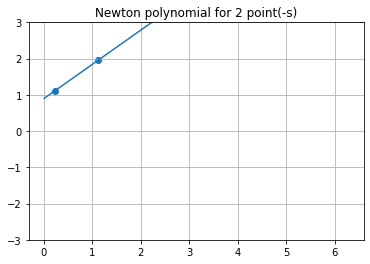

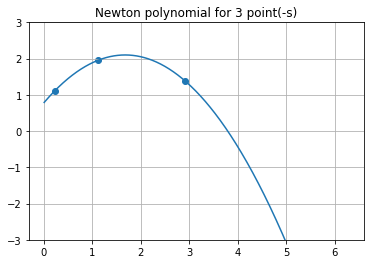

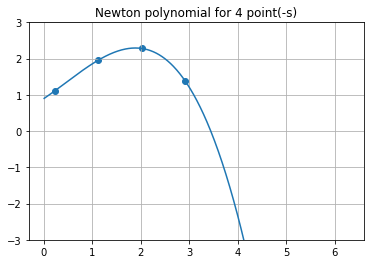

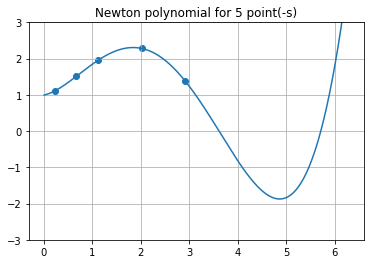

In [15]:
for i in range(n):
    fig, ax = plt.subplots()
    ax.grid()
    ax.plot(coords_x, coords_y[i])
    ax.set_ylim([-3, 3])
    ax.scatter(x[:i + 1], list(map(f, x[:i + 1])))
    ax.set_title(f"Newton polynomial for {i + 1} point(-s)")
    plt.show()

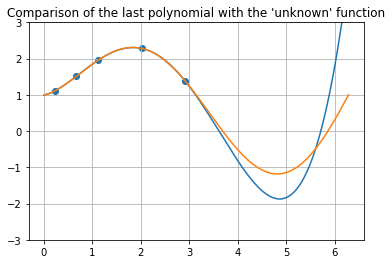

In [16]:
fig1, ax1 = plt.subplots()
ax1.grid()
ax1.plot(coords_x, coords_y[4])
ax1.plot(coords_x, list(map(f, coords_x)))
ax1.set_ylim([-3, 3])
ax1.scatter(x[:i + 1], list(map(f, x[:i + 1])))
ax1.set_title(f"Comparison of the last polynomial with the 'unknown' function")
plt.show()